![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Teste 2: Mais bisseção

Vamos continuar estudando o método de bisseção, agora com garantias de erros absolutos e relativos ao mesmo tempo.

## Questão 1: uma função auxiliar

Quando a bisseção retorna uma "raiz", ela dá o ponto médio de um intervalo $[a,b]$, onde temos certeza que há uma raiz de $f$.

Escreva uma função `absrel(a,b)` que, dado um intervalo $[a,b]$, retorna o maior erro absoluto e o maior erro relativo que pode ocorrer ao considerar que a raiz é o ponto médio deste intervalo.

In [85]:
import numpy as np
from numpy import infty

In [86]:
def absrel(a,b):
    m = (a + b) / 2

    err_absoluto = abs(m - a)

    if a * b <= 0:
        err_relativo = infty
    
    elif abs(a) < abs(b):
        err_relativo =  (a - b)/ (2 * a)
    
    else:
        err_relativo = (b - a) / (2 * b)

    return abs(err_absoluto), abs(err_relativo )

In [87]:
absrel(-0.5, 0)

(0.25, inf)

In [88]:
assert absrel(1,2) == (.5, .5)
assert absrel(10,11) == (0.5, 0.05)

In [89]:
assert absrel(-2,1) == (1.5, +infty)

Porquê o erro relativo do intervalo $[-2,1]$ é infinito?

Na fórmula do erro relativo aparece a raiz no denominador. Logo, o maior erro relativo possível se da com o menor valor, absoluto, no denominador. Que nesse caso é o 0, e com o 0 no denominador o erro relativo tende ao infinito.

## Questão 2: Outros retornos na bisseção

Modifique o método da bisseção para terminar quando o erro absoluto **e** o erro relativo
forem menores do que (ou iguais às) tolerâncias dadas em argumento.

Retorne uma tripla contendo, nesta ordem:
- uma estimativa para a raiz $z$,
- uma estimativa para o erro absoluto $e_{abs}$,
- uma estimativa para o erro relativo $e_{rel}$.

In [90]:
def bissecao(f, a, b, abstol=1e-10, reltol=1e-10):
    """Função que representa o algoritmo da bisseção para encontrar uma raiz para a função F, dentro de um intervalo dado
    a, b. E com critério de parada tanto o erro absoluto(abstol) quanto o erro relativo(reltol)
    Retorna a raiz.
    função, float, float, float, float -> tupla"""
    z = (a+b) / 2
    
    erro_abs = absrel(a, b)[0]
    erro_rel = absrel(a, b)[1]
    
    if erro_abs < abstol and erro_rel < reltol:
        return z, erro_abs, erro_rel
    
    if f(z) * f(a) < 0:
        tupla = bissecao(f, a, z, abstol, reltol)

    else:
        tupla = bissecao(f, z, b, abstol, reltol)

    raiz = tupla[0]
    erro_abs = abs(tupla[1])
    erro_rel = abs(tupla[2])
    
    return raiz, erro_abs, erro_rel

Não se preocupe em obter valores iguais para as cotas superiores dos erros absoluto e relativo.

O importante é que estas estimativas sejam **coerentes** com os requisitos do método da bisseção:

- o erro absoluto real (ou seja, a diferença entre a raiz certa e a raiz calculada) deve ser menor do que a estimativa do erro absoluto,
- o erro relativo real deve ser menor do que a estimativa do erro relativo.

Note que é exatamente isso que vai ser testado em seguida!

In [91]:
bissecao(np.cos, 1, 5)

(1.5707963267923333, 5.820766091346741e-11, 3.705614784221461e-11)

In [92]:
x,err,rel = bissecao(np.sin,1,5)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
assert abs(x - np.pi)/np.pi < rel
assert abs(x - np.pi) < err

In [93]:
# Testando que sai pela razão certa
assert rel < 1e-10
assert err < 1e-10

In [94]:
def f(x):
    return ((x**2 - 2)**2 - 2)**2 - 2 - x

In [95]:
x,err,rel = bissecao(f, 1.4, 1.6, 1e-10, 1e-12)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
v = 1.532088886238
assert abs(x - v)/v < rel
assert abs(x - v) < err

In [96]:
# Testando que sai pela razão certa
assert err < 1e-10
assert rel < 1e-12

## Questão 3: extremidades da bisseção

Modifique a sua implementação da bisseção para retornar uma lista com os intervalos considerados,


em ordem decrescente.

In [97]:
def bissecao_extremidades(f,a,b, abstol=1e-10,reltol=1e-10):
    """Função que pega o algoritmo da bisseção para encontrar uma raiz para a função F, dentro de um intervalo dado
    a, b. E com critério de parada tanto o erro absoluto(abstol) quanto o erro relativo(reltol), e retorna uma lista
    com todos os intervalos usados.
    função, float, float, float, float -> tupla"""
    
    intervalos = []

    while True:
        intervalos.append((a, b))

        z = (a+b) / 2

        erro_abs = absrel(a, b)[0]
        erro_rel = absrel(a, b)[1]
        
        if erro_abs < abstol and erro_rel < reltol:
            break

        if f(a) * f(z) < 0:
            b = z
        
        else:
            a = z
    
    return intervalos

In [98]:
# Vendo alguns dos intervalos iniciais
l = bissecao_extremidades(np.sin,1,5)
for I in l[:5]:
    print(I)

(1, 5)
(3.0, 5)
(3.0, 4.0)
(3.0, 3.5)
(3.0, 3.25)


In [99]:
lista_intervalos = bissecao_extremidades(np.sin,100,103)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-10
assert 35 <= len(lista_intervalos) <= 40

In [100]:
lista_intervalos = bissecao_extremidades(np.sin,100,103, abstol=1e-12, reltol=1e-12)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-12
assert abs(af - 32*np.pi) <= 2e-12
assert abs(bf - 32*np.pi) <= 2e-12
assert 40 <= len(lista_intervalos) <= 45

In [101]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

v = -0.4450418679126287
assert(abs(x - v)/v < 1e-12)
assert(abs(x - v) < 1e-8)

In [102]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

assert 40 <= len(lista_intervalos) <= 45

## Questão 4: Gráficos

Faça o gráfico do tamanho dos intervalos, em função do número de iterações,
para a bisseção do cosseno entre 0 e 3, com as tolerâncias padrão.

In [103]:
import matplotlib.pyplot as plt

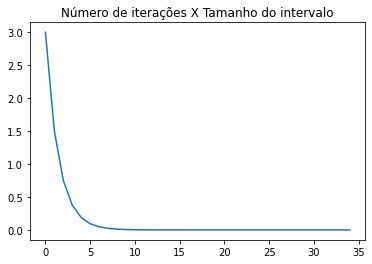

In [104]:
intervalos = bissecao_extremidades(np.cos, 0, 3)

tamanhos = [abs(i[1] - i[0]) for i in intervalos]
y = [x for x in range(len(tamanhos))]

plt.plot(y, tamanhos)
plt.title('Número de iterações X Tamanho do intervalo')
# Não apague a linha abaixo, ela faz os assert's dos gráficos darem certo
ax = plt.gca()

In [105]:
assert len(ax.lines) == 1
assert len(ax.get_title()) >= 10

In [106]:
linha = ax.lines[0]
assert 5e-11 < min(linha.get_ydata()) < 2e-10
assert max(linha.get_ydata()) == 3

Agora, faça um gráfico com
- o comprimento dos intervalos
- a distância entre a extremidade inferior e a raiz correta
- a distância entre a extremidade superior e a raiz correta

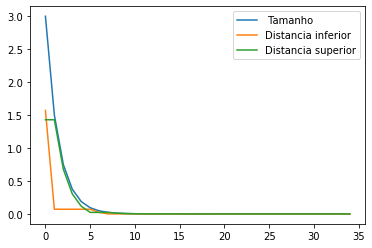

In [107]:
intervalos = bissecao_extremidades(np.cos, 0, 3)
raiz = (intervalos[-1][0]+intervalos[-1][1]) / 2

tamanho = [abs(i[1] - i[0]) for i in intervalos]
distancia_inf = [abs(i[0] - raiz) for i in intervalos]
distancia_sup = [abs(i[1] - raiz) for i in intervalos]

x = range(len(intervalos))

plt.plot(x, tamanho,label=' Tamanho')
plt.plot(x, distancia_inf, label='Distancia inferior')
plt.plot(x, distancia_sup, label='Distancia superior')
plt.legend()

ax = plt.gca()

In [108]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

Repita o gráfico acima para o polinômio $f$ acima, com tolerância `1e-13`, tanto absoluta como relativa.

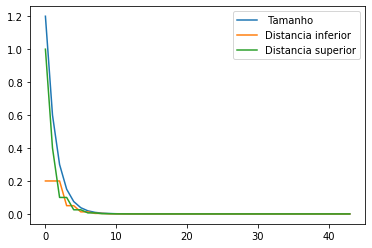

In [109]:
intervalos = bissecao_extremidades(f, 1.8, 3, 1e-13, 1e-13)
raiz = (intervalos[-1][0]+intervalos[-1][1]) / 2

tamanho = [abs(i[1] - i[0]) for i in intervalos]
distancia_inf = [abs(i[0] - raiz) for i in intervalos]
distancia_sup = [abs(i[1] - raiz) for i in intervalos]

x = range(len(intervalos))

plt.plot(x, tamanho,label=' Tamanho')
plt.plot(x, distancia_inf, label='Distancia inferior')
plt.plot(x, distancia_sup, label='Distancia superior')
plt.legend()

ax = plt.gca()

In [110]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

In [111]:
for l in ax.lines:
    assert 40 <= len(l.get_xdata()) <= 45

O que você observa de comum nos gráficos com relação aos erros entre as extremidades dos intervalos?

Podemos observar que claramente o tamanho = distancia_inferior + distancia_superior.
E que quanto maior o número de iterações, menor o tamanho.